In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [2]:
df = pd.read_csv("Resources/prices.csv")

In [3]:
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')

In [4]:
df.set_index('symbol', inplace=True)

In [5]:
df = df.sort_values('date')

In [6]:
df.index.unique()

Index(['SYMC', 'IFF', 'ILMN', 'INTC', 'INTU', 'IP', 'IPG', 'IR', 'IRM', 'IDXX',
       ...
       'NAVI', 'QRVO', 'CFG', 'WRK', 'KHC', 'PYPL', 'HPE', 'CSRA', 'WLTW',
       'FTV'],
      dtype='object', name='symbol', length=501)

In [8]:
df.dtypes

date      datetime64[ns]
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object

In [7]:
tickers = df.index.unique()


In [9]:
IFF_df = df.loc['IFF', :]
IFF_df.set_index('date', inplace=True)
IFF_df.drop('open', axis=1, inplace=True)
IFF_df.head(20)

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,close,low,high,volume
date,,,,
2010-01-04,42.009998,41.500000,42.020000,286000.0
2010-01-05,41.700001,41.439999,41.930000,348900.0
2010-01-06,41.869999,41.509998,41.970001,375600.0
2010-01-07,41.549999,41.070000,41.840000,402000.0
2010-01-08,41.400002,40.980000,41.400002,249000.0
2010-01-11,41.529999,41.169998,41.619999,249900.0
2010-01-12,41.419998,41.000000,41.520000,331900.0
2010-01-13,42.110001,41.369999,42.150002,295900.0
2010-01-14,42.119999,41.830002,42.200001,278600.0


In [11]:
IFF_df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='date', length=1762, freq=None)

In [37]:
dataset1 = IFF_df.values
dataset1

array([[4.20099980e+01, 4.15000000e+01, 4.20200000e+01, 2.86000000e+05],
       [4.17000010e+01, 4.14399990e+01, 4.19300000e+01, 3.48900000e+05],
       [4.18699990e+01, 4.15099980e+01, 4.19700010e+01, 3.75600000e+05],
       ...,
       [1.18800003e+02, 1.18599998e+02, 1.19559998e+02, 4.04600000e+05],
       [1.18900002e+02, 1.18650002e+02, 1.19209999e+02, 4.13300000e+05],
       [1.17830002e+02, 1.17529999e+02, 1.19300003e+02, 5.04500000e+05]])

In [32]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaled_data1 = scaler1.fit_transform(dataset1)

In [39]:
X1_test, y1_test = [], []
for i in range(30,len(IFF_df)):
    X1_test.append(scaled_data1[i-30:i,0:4])
    y1_test.append(scaled_data1[i,0])
X1_test, y1_test = np.array(X1_test), np.array(y1_test)

In [40]:
X1_test.shape

(1732, 30, 4)

In [41]:
closing_price1 = model.predict(X1_test)

In [42]:
final1 = []
for price in closing_price1:
    final1.append(np.pad(price, (0, 3), 'constant'))
final_price1 = scaler1.inverse_transform(final1)
close1 = []
for price in final_price1:
    close1.append(price[0])


In [44]:
len(close1)

1732

In [46]:
valid = IFF_df[30:]
len(valid)

1732

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


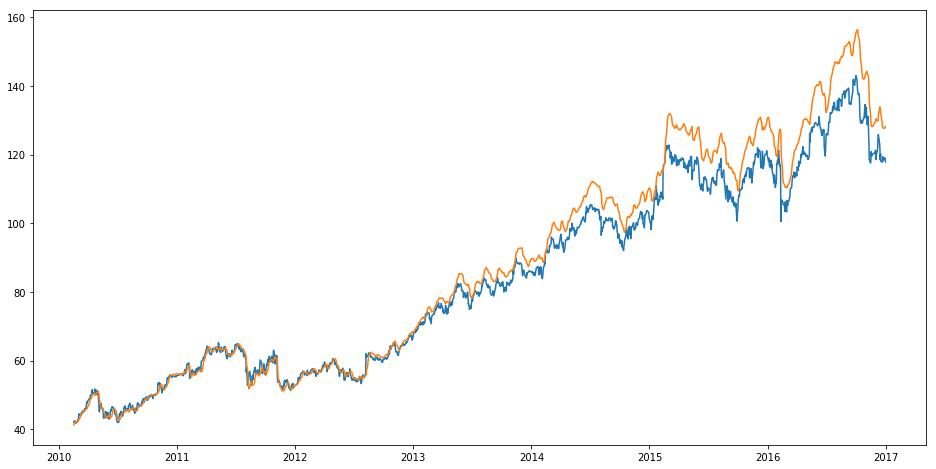

In [47]:
valid['Predictions'] = close1
plt.figure(figsize=(16,8))
#plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])

In [10]:
MSFT_df = df.loc['MSFT', :]

In [11]:
MSFT_df.set_index('date', inplace=True)

In [12]:
MSFT_df.drop('open', axis=1, inplace=True)

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


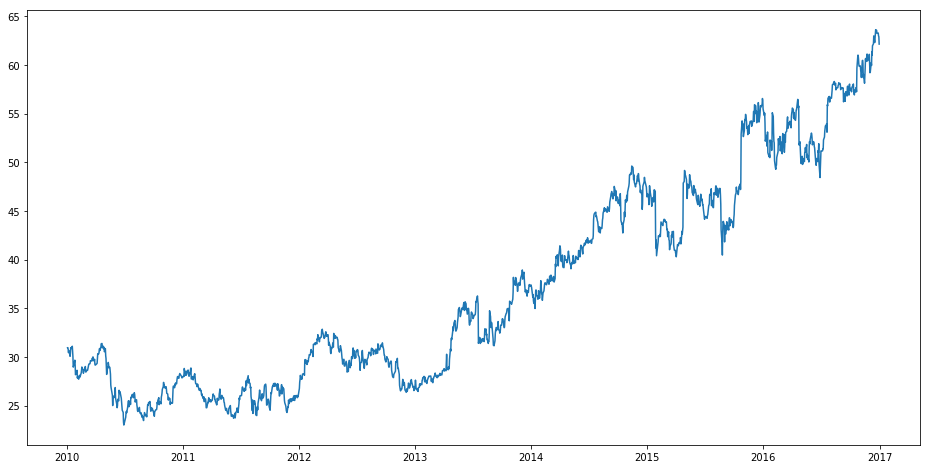

In [13]:
plt.figure(figsize=(16,8))
plt.plot(MSFT_df['close'], label='Close Price history')

In [38]:
MSFT_df.head()

,close,low,high,volume
date,,,,
2010-01-04,30.950001,30.590000,31.100000,38409100.0
2010-01-05,30.959999,30.639999,31.100000,49749600.0
2010-01-06,30.770000,30.520000,31.080000,58182400.0
2010-01-07,30.450001,30.190001,30.700001,50559700.0
2010-01-08,30.660000,30.240000,30.879999,51197400.0


In [15]:
dataset = MSFT_df.values
dataset

array([[3.0950001e+01, 3.0590000e+01, 3.1100000e+01, 3.8409100e+07],
       [3.0959999e+01, 3.0639999e+01, 3.1100000e+01, 4.9749600e+07],
       [3.0770000e+01, 3.0520000e+01, 3.1080000e+01, 5.8182400e+07],
       ...,
       [6.2990002e+01, 6.2830002e+01, 6.3400002e+01, 1.4653300e+07],
       [6.2900002e+01, 6.2730000e+01, 6.3200001e+01, 1.0250600e+07],
       [6.2139999e+01, 6.2029999e+01, 6.2990002e+01, 2.5579900e+07]])

In [16]:
train = dataset[0:987,:]
valid = dataset[987:,:]
train

array([[3.0950001e+01, 3.0590000e+01, 3.1100000e+01, 3.8409100e+07],
       [3.0959999e+01, 3.0639999e+01, 3.1100000e+01, 4.9749600e+07],
       [3.0770000e+01, 3.0520000e+01, 3.1080000e+01, 5.8182400e+07],
       ...,
       [3.8130001e+01, 3.7820000e+01, 3.8290001e+01, 2.2090400e+07],
       [3.8450001e+01, 3.8060001e+01, 3.8779999e+01, 4.2950400e+07],
       [3.8310001e+01, 3.8080002e+01, 3.8490002e+01, 5.2109800e+07]])

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [18]:
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0:4])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(957, 30, 4)

In [20]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],4)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [21]:

model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
 - 30s - loss: 5.6841e-04


In [22]:
X_test, y_test = [], []
for i in range(987,len(MSFT_df)):
    X_test.append(scaled_data[i-30:i,0:4])
    y_test.append(scaled_data[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [23]:
X_test.shape

(775, 30, 4)

In [24]:
closing_price = model.predict(X_test)

In [25]:
final = []
for price in closing_price:
    final.append(np.pad(price, (0, 3), 'constant'))


In [26]:
final_price = scaler.inverse_transform(final)

In [27]:
close = []
for price in final_price:
    close.append(price[0])


C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


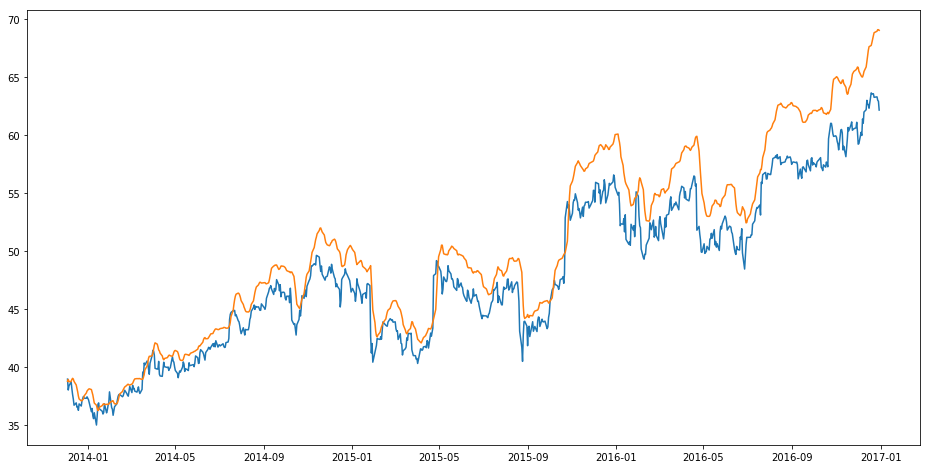

In [28]:
train = MSFT_df[:987]
valid = MSFT_df[987:]
valid['Predictions'] = close
plt.figure(figsize=(16,8))
#plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])

In [ ]:
close

In [41]:
new_valid = valid[700:]
len(new_valid)

75

In [46]:
valid['error'] = valid.loc[:, 'Predictions'] - valid.loc[:, 'close']
valid.head()

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,close,low,high,volume,Predictions,error
date,,,,,,
2013-12-04,38.939999,38.119999,38.980000,51983600.0,38.037044,-0.902955
2013-12-05,38.000000,37.180000,38.880001,116305000.0,38.164657,0.164657
2013-12-06,38.360001,37.990002,38.549999,36457300.0,37.927141,-0.432860
2013-12-09,38.709999,38.369999,38.869999,30286000.0,37.967916,-0.742083
2013-12-10,38.110001,38.020000,38.900002,37828600.0,38.165903,0.055902


In [47]:
valid['error'].mean()

-0.14615097923861958